<a href="https://colab.research.google.com/github/Series-Parallel/Machine_in_Learning/blob/main/Decision_trees_using_YDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ydf -U

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 25.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6


In [2]:
import ydf
import numpy as np
import pandas as pd

This Colab uses the Palmer Penguins dataset, which contains size measurements for three penguin species:

* Chinstrap
* Gentoo
* Adelie





This is a classification problem—the goal is to predict the species of penguin based on data in the Palmer's Penguins dataset. Here are the penguins:

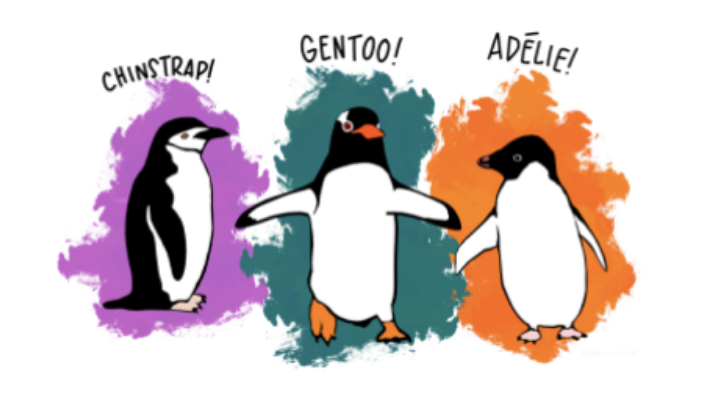

In [3]:
path = "https://storage.googleapis.com/download.tensorflow.org/data/palmer_penguins/penguins.csv"
dataset = pd.read_csv(path)
label = "species"

In [4]:
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [5]:
np.random.seed(1)
is_test = np.random.rand(len(dataset)) < 0.2

**The Seed:** The seed is like a starting point for the random number generator. When you set a seed, you're essentially telling the random number generator to start from a specific place in its sequence.

In machine learning, we often perform experiments that involve randomness (like splitting data into training and testing sets, as in the example). If we didn't use a seed, each time we ran our code, the data would be split differently, and our results might vary. By setting a seed, we ensure that the data split is the same every time, allowing us to compare results more reliably.

In [6]:
train_dataset = dataset[~is_test]
test_dataset = dataset[is_test]

In [7]:
print("Training examples: ", len(train_dataset))
print("Testing examples: ", len(test_dataset))

Training examples:  272
Testing examples:  72


## Training a decision tree with default parameters

In [8]:
model = ydf.CartLearner(label=label).train(train_dataset)

Train model on 272 examples
Model trained in 0:00:00.005898


In [9]:
model.plot_tree()

* Red: Represents the Adelie penguin species.
* Blue: Represents the Gentoo penguin species.
* Green: Represents the Chinstrap penguin species.

Colab shows that the root condition contains 243 examples. However, you might remember that the training dataset contained 272 examples. The remaining 29 examples have been reserved automatically for validation and the tree pruning.

In [10]:
train_evaluation = model.evaluate(train_dataset)
print("train accuracy:", train_evaluation.accuracy)

train accuracy: 0.9558823529411765


In [11]:
test_evaluation = model.evaluate(test_dataset)
print("test accuracy:", test_evaluation.accuracy)

test accuracy: 0.9166666666666666


## Improving the hyperparameters of model

The decision tree shown above is small, and the leaf with 104 and 48 example contains a mix of Adelie and Gentoo labels. Why didn't the algorithm divide this leaf further? There are two possible reasons:

* The minimum number of samples per leaf (min_examples=5 by default) may have been reached.
* The tree might have been divided and then pruned to prevent overfitting.

Reduce the minimum number of examples to 1 and we will see the results

In [13]:
model = ydf.CartLearner(label=label, min_examples=1).train(train_dataset)
model.plot_tree()

Train model on 272 examples
Model trained in 0:00:00.002803


In [14]:
print(model.evaluate(test_dataset).accuracy)

0.9166666666666666


Well, it seems like the tree is already doing its best!